### 1. Get Cape Town Pedestrian Network from OSM and simplify
The following code uses a bounding box to create a graph of the CPT pedestrian network. It then simplifies the nodes and edges

In [12]:
import osmnx as ox
print(ox.__version__)

2.0.1


In [21]:
import os
os.getcwd()

'/Users/nikhildesai'

In [13]:
import osmnx as ox
import matplotlib.pyplot as plt

# Define bounding box as a named argument (north, south, east, west)
bbox = (18.307,-34.391,19.019,-33.468)

In [14]:
# Extract pedestrian network
G = ox.graph.graph_from_bbox(bbox=bbox, network_type="walk", simplify=True)

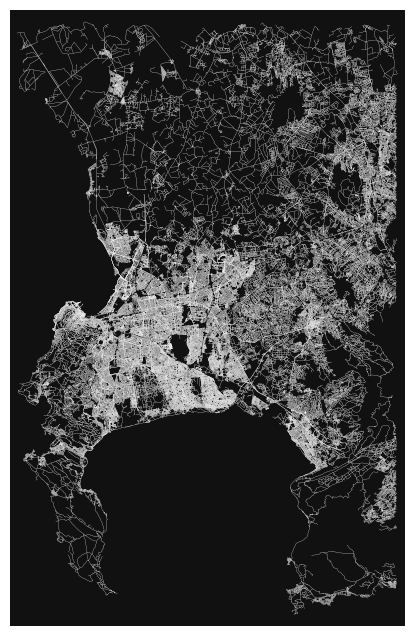

In [15]:
# Plot the graph
fig, ax = ox.plot.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.1)

In [16]:
# get a GeoSeries of consolidated intersections
G = ox.projection.project_graph(G)
ints = ox.simplification.consolidate_intersections(
    G, rebuild_graph=False, tolerance=15, dead_ends=True
)
len(ints)

134396

In [17]:
# consolidate intersections and rebuild graph topology
# this reconnects edge geometries to the new consolidated nodes
G2 = ox.simplification.consolidate_intersections(
    G, rebuild_graph=True, tolerance=15, dead_ends=False
)
len(G2)

116770

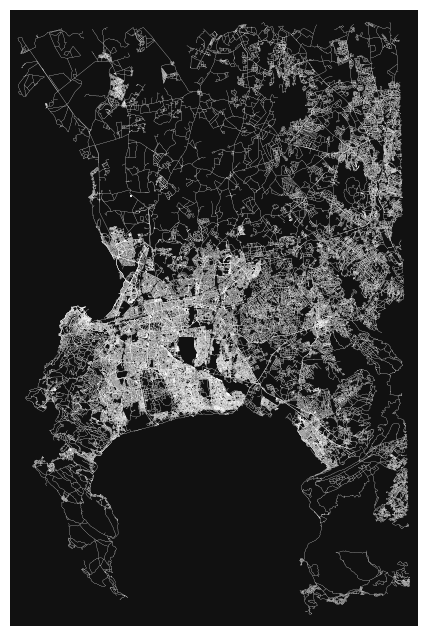

In [18]:
fig, ax = ox.plot.plot_graph(G2, node_size=0, edge_color="w", edge_linewidth=0.1)

In [19]:
# Assign CRS
G2.graph["crs"] = "EPSG:3857" 

In [22]:
# save cpt graph as .gpkg
# ox.save_graph_geopackage(G2, "G_ped.gpkg")
ox.save_graph_geopackage(G, "G_ped.gpkg")